<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Mobile_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
sns.set()


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/mobile_prices.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
np.around(data.describe(), 2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,...,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.0,2000.00,2000.00
mean,1238.52,0.5,1.52,0.51,4.31,0.52,32.05,0.50,140.25,4.52,...,645.11,1251.52,2124.21,12.31,5.77,11.01,0.76,0.5,0.51,1.50
std,439.42,0.5,0.82,0.50,4.34,0.50,18.15,0.29,35.40,2.29,...,443.78,432.20,1084.73,4.21,4.36,5.46,0.43,0.5,0.50,1.12
min,501.00,0.0,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,...,0.00,500.00,256.00,5.00,0.00,2.00,0.00,0.0,0.00,0.00
25%,851.75,0.0,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,...,282.75,874.75,1207.50,9.00,2.00,6.00,1.00,0.0,0.00,0.75
50%,1226.00,0.0,1.50,1.00,3.00,1.00,32.00,0.50,141.00,4.00,...,564.00,1247.00,2146.50,12.00,5.00,11.00,1.00,1.0,1.00,1.50
75%,1615.25,1.0,2.20,1.00,7.00,1.00,48.00,0.80,170.00,7.00,...,947.25,1633.00,3064.50,16.00,9.00,16.00,1.00,1.0,1.00,2.25
max,1998.00,1.0,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,...,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.0,1.00,3.00


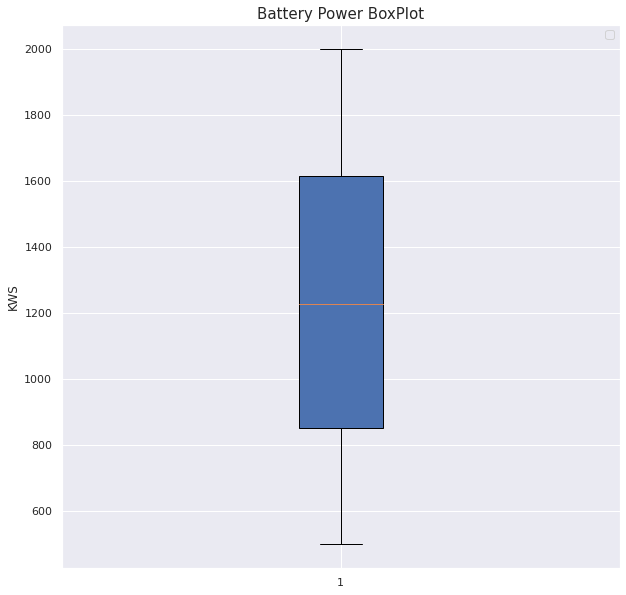

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(data['battery_power'], patch_artist=True)
plt.title("Battery Power BoxPlot", fontsize=15)
plt.ylabel("KWS")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Correlation Between Columns values')

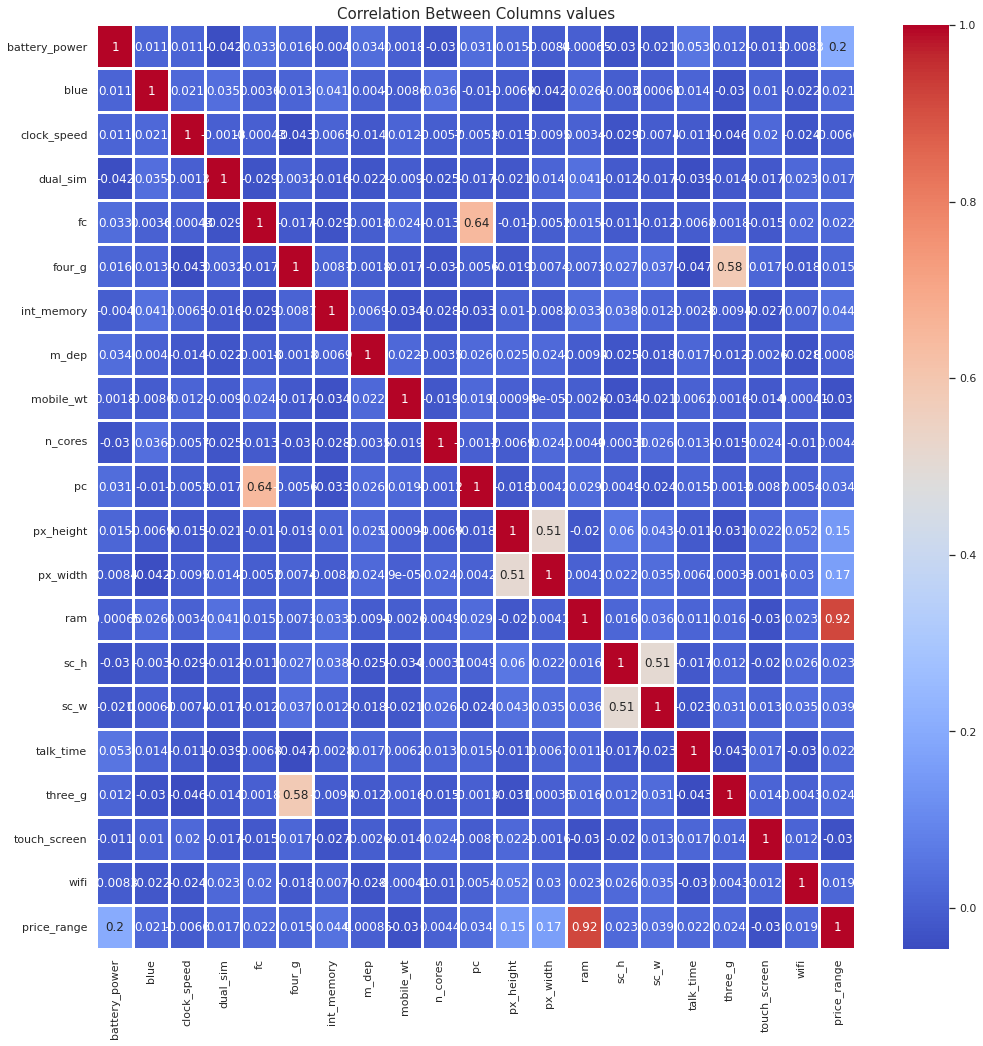

In [ ]:
plt.figure(figsize=(17,17))
sns.heatmap(data.corr(), cmap = 'coolwarm', linewidths=2, linecolor="White", annot=True) 
plt.title("Correlation Between Columns values", fontsize=15)


In [ ]:
ram = data.groupby(['touch_screen'])['wifi'].sum()
ram

touch_screen
0    498
1    516
Name: wifi, dtype: int64

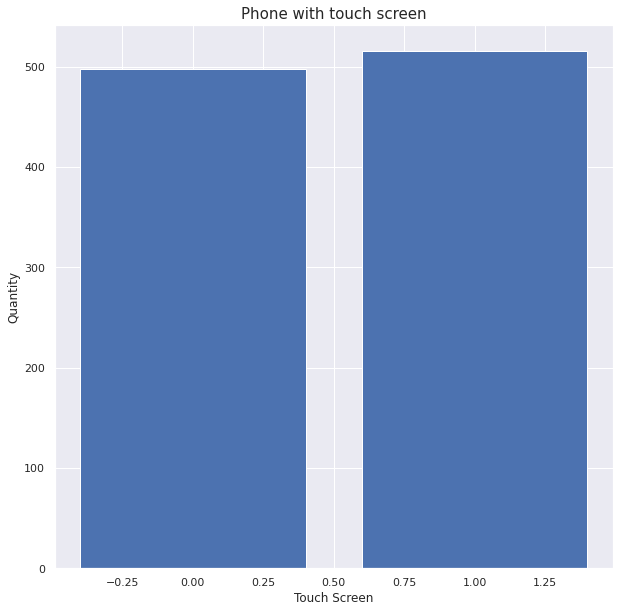

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(x=ram.index, height=ram.values,  ) 
plt.xlabel("Touch Screen")
plt.ylabel("Quantity")
plt.title("Phone with touch screen", fontsize=15)
plt.show()

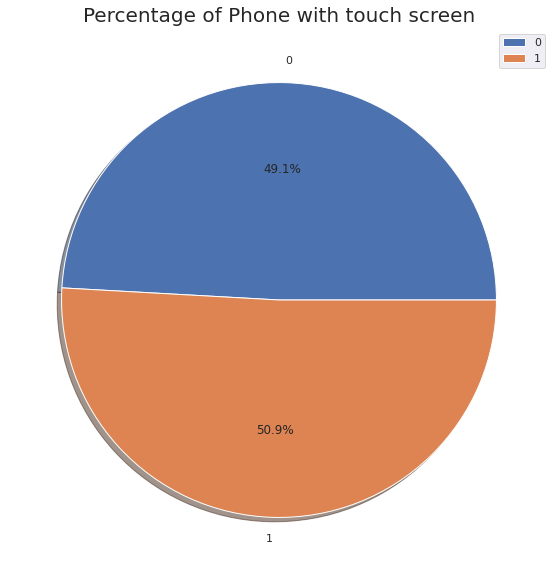

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(x=ram.values, labels=ram.index, autopct='%1.1f%%', shadow=True)
plt.title("Percentage of Phone with touch screen", fontsize=20)
plt.legend()
plt.show()

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values 
X = StandardScaler().fit_transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size= 0.20,
                                                    random_state=0)


In [ ]:
from sklearn.linear_model import LogisticRegression 
lreg = LogisticRegression()
lreg.fit(x_train, y_train) 
y_pred = lreg.predict(x_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100 
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  64.5


In [ ]:
y_pred

array([3, 0, 2, 1, 3, 0, 0, 2, 2, 2, 1, 3, 1, 1, 2, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 2, 0, 1, 1, 1, 3, 0, 0, 3, 2, 3, 3, 3, 3,
       2, 2, 0, 1, 3, 1, 0, 2, 0, 3, 0, 3, 3, 1, 0, 3, 3, 2, 2, 1, 1, 3,
       3, 3, 2, 2, 3, 2, 1, 0, 1, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0, 0, 1, 0,
       1, 3, 2, 2, 1, 0, 0, 3, 2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 3, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 1, 0, 1, 0, 0, 3, 2, 2, 1, 2, 0, 0, 0, 3, 1, 3,
       3, 2, 3, 3, 3, 3, 0, 1, 1, 3, 2, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 1, 2, 2, 1, 3, 3, 3, 3, 0, 1, 3, 2, 1, 3, 3, 0,
       1, 1, 3, 0, 3, 1, 0, 1, 2, 1, 3, 0, 3, 3, 3, 3, 0, 1, 2, 1, 0, 2,
       2, 0, 3, 3, 3, 0, 1, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 3, 0, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 3, 2, 0, 2, 2, 0, 0, 0, 3,
       3, 2, 0, 0, 2, 3, 3, 1, 3, 0, 2, 1, 1, 0, 1, 2, 3, 2, 1, 0, 1, 3,
       3, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       1, 3, 3, 3, 0, 1, 2, 0, 2, 2, 3, 0, 1, 0, 1,

In [ ]:
(unique, counts) = np.unique(y_pred, return_counts=True) 
price_range = np.asarray((unique, counts)).T 
price_range

array([[  0, 100],
       [  1,  94],
       [  2,  97],
       [  3, 109]])

In [ ]:
px.scatter(data, x='ram', y='battery_power', color='price_range', trendline='ols')